In [1]:
import sys
import os
sys.path.insert(0, os.path.abspath(os.path.join('..')))
from src import *
from itertools import product

import numpy as np
from matplotlib import pyplot as plt

In [2]:
moments = np.array([2, 3])
ps = np.array([0.85, 0.9, 0.95, 1.0, 1.05, 1.1, 1.15, 1.5, 2.0])
system_sizes = np.array([100, 200, 400, 800, 1600])#, 3200])#, 6400]
realizations = 100


def produce_data(ps, system_sizes, moments, realizations, bins = 50):
    widths = [L // bins for L in system_sizes]
    fractal_dimension = np.zeros((len(ps), len(system_sizes), len(moments)))
    params = product(enumerate(ps), enumerate(system_sizes), enumerate(moments))
    for (i, p), (j, L), (k, m) in params:
        moment_data = 0
        for _ in range(realizations):
            ness_correlation = C_NESS(0, 0, A(L, p))
            _, eigenvectors = np.linalg.eig(ness_correlation)
            moment_data += np.mean(calculate_moments(eigenvectors.T, widths[j], m))
        moment_data /= realizations
        fractal_dimension[i,j,k] = generalized_fractal_dimension(
            moment_data, widths[j], m, L)
    return fractal_dimension

data = produce_data(ps, system_sizes, moments, realizations)
print(data)

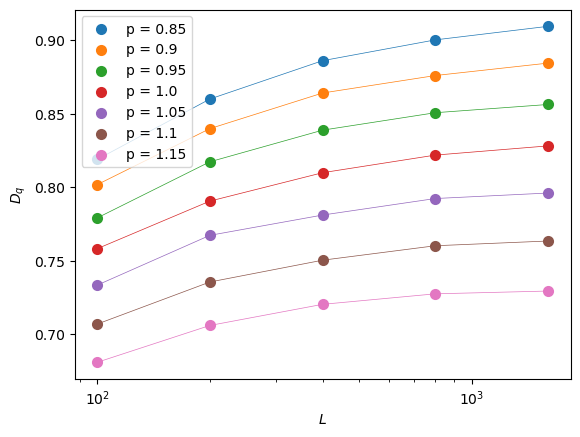

In [63]:
fig, ax = plt.subplots()
for (i, p) in enumerate(ps):
    ax.scatter(system_sizes, data[i, :, 0], linewidth=2.0, label="p = {}".format(p))
    ax.plot(system_sizes, data[i, :, 0], linewidth=0.5)
ax.set_xlabel(r"$L$")
ax.set_ylabel(r"$D_q$")
ax.set_xscale('log')
ax.legend()
plt.show()